In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# import corrplot as crp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import OneHotEncoder
enco = OneHotEncoder()
from imblearn.over_sampling import SMOTE 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
label_encoder = preprocessing.LabelEncoder() 
from sklearn.metrics import accuracy_score, confusion_matrix, \
                            classification_report, f1_score, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix
# from seaborn.linearmodels import corrplot

In [ ]:
data = pd.read_csv('newdata1.csv',index_col=None)
data


In [4]:
dataframe = pd.read_csv('dataset.csv',index_col=None)
# # dataframe.info()
# rev=dataframe['Revenue']
# rev
dumweknd = pd.get_dummies(dataframe.Weekend)
dumweknd
# dataframe['Month'].value_counts()

dataframe1=dataframe.copy()
dataframe1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
dataframe1['Month']= label_encoder.fit_transform(dataframe1['Month']) 
dataframe1['OperatingSystems'] = dataframe1['OperatingSystems'].astype('category')
dataframe1['Browser'] = dataframe1['Browser'].astype('category')
dataframe1['Weekend'] = dataframe1['Weekend'].astype(np.int)
# dataframe.info()

dataframe1= dataframe1.drop('Revenue',axis=1)
dum_for_vis = pd.get_dummies(dataframe.VisitorType)
dataframe1= pd.concat([dataframe1,dum_for_vis], axis='columns') # run only once else multiple copied
dataframe1=dataframe1.drop('VisitorType',axis='columns')

dataframe1

# dataframe.info()

In [ ]:
data_get_dum = pd.get_dummies(dataframe)
data_get_dum = data_get_dum.drop(['Revenue','Weekend'],axis='columns')
data_get_dum= pd.concat([data_get_dum,dumweknd], axis='columns')

data_get_dum

dataframe['Month'].value_counts()

In [ ]:
# data_get_dum with features removed

data_featured = data_get_dum
data_featured = data_get_dum.drop(['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates'],axis=1)
data_featured
data_featured_further = data_get_dum.drop(['Month_Sep','Month_Aug','Month_Jul','Month_June','Month_Feb'],axis=1)
data_featured_further
# data_featured_further['Month_Nov']

In [ ]:
# dataframe to be ready for scalling

data  # 15 columns , attribute removed
dataframe1 # 19 col with visitor type one hot encoded, rest ordinal encoded
# dataframe1.to_csv('dataframe1FINAL.csv',index_label=False)
data_get_dum  # 29 columns with month , visitor type and revenue one hot encoded
# data_get_dum.to_csv('data_get_dumFINAL.csv',index_label=False)
data_featured  # 25 col, with dropped attrb from data_get_dum
# data_featured.to_csv('data_featuredFINAL.csv',index_label=False)
data_featured_further # 24 col, further attr of month removed 
dataframe1

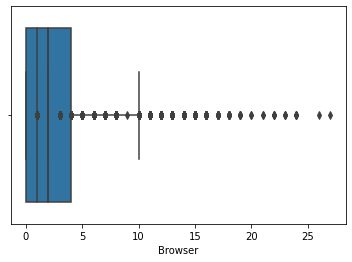

In [ ]:
# outliers
sns.boxplot(x=data_featured['Administrative'])
sns.boxplot(x=data_featured['Browser'])

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline  

# plt.boxplot(data_featured.Administrative)
# plt.boxplot(out_month)

# scalling

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(data)
Y = scaler.fit_transform(dataframe1)
Z = scaler.fit_transform(data_get_dum)
W = scaler.fit_transform(data_featured)
T = scaler.fit_transform(data_featured_further)
# print(X)

In [13]:
rev=dataframe['Revenue']

# smote


In [15]:
print(X.shape)
print(Y.shape)
print(Z.shape)
print(T.shape)
print(W.shape)
print(X.shape)

(12330, 15)
(12330, 19)
(12330, 29)
(12330, 24)
(12330, 25)
(12330, 15)


In [ ]:
# from imblearn.over_sampling as SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority');
x_smote, y_smote = smote.fit_sample(X,rev);

print("Shape of x_smote :", x_smote.shape)
print("Shape of y_smote :", y_smote.shape)



In [37]:
#define COnfusion matrix
def ConfusionMatrix(A,B):
  CM=confusion_matrix(A, B)
  fig, ax = plot_confusion_matrix(CM,show_absolute=True,show_normed=True,colorbar=True)
  plt.show()

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, stratify=y_smote,)


print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)



Shape of x_train : (14590, 15)
Shape of x_test : (6254, 15)
Shape of y_train : (14590,)
Shape of y_test : (6254,)


In [34]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, rev)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

x = scaler.fit_transform(X)
print(y_sm)

Shape of X before SMOTE: (12330, 15)
Shape of X after SMOTE: (20844, 15)
[False False False ...  True  True  True]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# LOGISTIC REGRESSION


In [21]:

# x_train, x_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.3, random_state=1)
# print(x_train)

In [25]:
# Model Training
# logis = LogisticRegression(random_state = 50, max_iter = 5000)
logis=LogisticRegression(random_state = 50, max_iter = 100,penalty= 'l1', solver= 'liblinear',C= 0.000263)
# logis = LogisticRegression()
lr = logis.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [26]:
# Model Evaluation
m = confusion_matrix(y_test,y_pred_lr)
print("Logistic Regression:")
print("Accuracy: ", (m[0][0] + m[1][1]) / (m[0][0] + m[0][1] + m[1][0] + m[1][1]))
print(classification_report(y_test,y_pred_lr))
# print("Testing Accuracy :", logreg.score(x_test, y_test))

Logistic Regression:
Accuracy:  0.8173968660057563
              precision    recall  f1-score   support

       False       0.76      0.92      0.83      3127
        True       0.90      0.72      0.80      3127

    accuracy                           0.82      6254
   macro avg       0.83      0.82      0.82      6254
weighted avg       0.83      0.82      0.82      6254



In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
logreg=LogisticRegression(random_state = 50, max_iter = 5000)
# logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
# evaluating the model
print("Training Accuracy :", logreg.score(x_train, y_train))
print("Testing Accuracy :", logreg.score(x_test, y_test))
# classification report
# confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cr)
confusion_matrix(y_test,y_pred)

Training Accuracy : 0.8347498286497601
Testing Accuracy : 0.8313079629037416
              precision    recall  f1-score   support

       False       0.79      0.89      0.84      3127
        True       0.88      0.77      0.82      3127

    accuracy                           0.83      6254
   macro avg       0.84      0.83      0.83      6254
weighted avg       0.84      0.83      0.83      6254



array([[2797,  330],
       [ 725, 2402]])

In [ ]:
print(X.shape)
print(Y.shape)
print(Z.shape)
print(T.shape)
print(W.shape)
print(X.shape)

In [ ]:
# from imblearn.over_sampling as SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority');
x_smote, y_smote = smote.fit_sample(X,rev);

print("Shape of x_smote :", x_smote.shape)
print("Shape of y_smote :", y_smote.shape)



In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, stratify=y_smote,)


print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)



Shape of x_train : (14590, 15)
Shape of x_test : (6254, 15)
Shape of y_train : (14590,)
Shape of y_test : (6254,)


In [30]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, rev)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

x = scaler.fit_transform(X)
print(y_sm)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Shape of X before SMOTE: (12330, 15)
Shape of X after SMOTE: (20844, 15)
[False False False ...  True  True  True]


# SVM 1



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, \
                            classification_report, f1_score, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# svclassifier=SVC(kernel='linear') # not so good
svclassifier=SVC(kernel='rbf') # good output
# svclassifier=SVC(kernel='poly') # bad
# svclassifier=SVC(kernel='sigmoid') # worse
svclassifier.fit(x_train,y_train)

y_predict=svclassifier.predict(x_test)

# evaluating the model
print("Training Accuracy :", svclassifier.score(x_train, y_train))
print("Testing Accuracy :", svclassifier.score(x_test, y_test))

# eveluate confusion matrix
print(classification_report(y_test,y_predict))

# confusion matrix
ConfusionMatrix(y_test,y_predict)

# KNN


In [ ]:
#import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

#Create KNN Classifier

knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

# evaluating the model
print("Training Accuracy :", knn.score(x_train, y_train))
print("Testing Accuracy :", knn.score(x_test, y_test))

confusion_matrix(y_test,y_pred)

# eveluate confusion matrix
print(classification_report(y_test,y_pred))


# confusion matrix
ConfusionMatrix(y_test,y_pred)

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(min_samples_leaf=40,min_samples_split=40,random_state=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


# classification report
print(classification_report(y_test, y_pred))
# print(cr)


# confusion matrix
ConfusionMatrix(y_test,y_pred)

# DECISION TREE

In [35]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(min_samples_leaf=40,min_samples_split=40,random_state=100,)
DTC.fit(X, rev)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

Training Accuracy : 0.795956134338588
Testing Accuracy : 0.7951710905020787
              precision    recall  f1-score   support

       False       0.72      0.96      0.82      3127
        True       0.94      0.63      0.75      3127

    accuracy                           0.80      6254
   macro avg       0.83      0.80      0.79      6254
weighted avg       0.83      0.80      0.79      6254



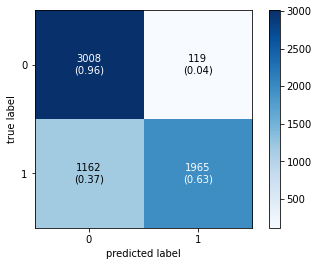

In [41]:
y_pred=DTC.predict(x_test)

# evaluating the model
print("Training Accuracy :", DTC.score(x_train, y_train))
print("Testing Accuracy :", DTC.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
ConfusionMatrix(y_test,y_pred)

# HYPER PARAMETER TUNE

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
 
#grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
 
kfold = KFold(n_splits=5, random_state=42)
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,param_grid,verbose=True,cv=kfold)
logreg_cv.fit(x_smote,y_smote)
 
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/lo

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-pack

In [ ]:
 
#grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
 
kfold = KFold(n_splits=5, random_state=42)
svclass=SVC(kernel='rbf')
# logreg=LogisticRegression()
svclass_cv=GridSearchCV(svclass,param_grid,verbose=True,cv=kfold)
svclass_cv.fit(x_train,y_train)
 
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",svclass_cv.best_score_)

In [ ]:

# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.model_selection import KFold
 
# param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': ['scale','auto'], 
#               'kernel': ['rbf','linear']}
  
# kfold = KFold(n_splits=5, random_state=42)
# svclassifier=SVC()
# svc_cv=GridSearchCV(svclassifier,param_grid,verbose=True,cv=kfold)
# # svc_cv.fit(x_smote,y_smote)

# svc_cv.fit(X_sm, y_sm)
# print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
# print("accuracy :",svc_cv.best_score_)#
